# Prova Data Science. Hackató Jump2Digital

#### Autor: Marina Arias Queralt

En aquesta prova, es generarà un conjunt de dades que ens permetrà determinar si els accidents de trànsit que tenen lloc en una zona determinada tenen un impacte significatiu en el preu mitjà mensual del lloguer de les vivendes situades en aquesta àrea.

Per dur a terme aquest anàlisi, disposem de dos conjunts de dades de l'any 2017 proporcionades per la plataforma Open Data Barcelona:

+ 2017_Lloguer_preu_trim.csv: ens proporciona el preu mitjà mensual de lloguer (€/mes) i per superfície (€/m2) a la ciutat de Barcelona.

+ 2017_ACCIDENTS_CAUSA_CONDUCTOR_GU_BCN_.csv: ens proporciona informació sobre els accidents de trànsit gestionats per la Guàrdia Urbana a la ciutat de Barcelona.



### 1. Descarrega de dades mitjançant la API de Open Data Barcelona


In [1]:
import requests
import pandas as pd

def extreu_totes_les_dades(url_api, resource_id):
    """
    Funció que extreu totes les dades dels jocs de dades procedents d'una API específica.

    Paràmetres:
    + url_api (str): URL de la API d'on extreiem les dades.
    + resource_id (str): Identificador del joc de dades a descargar dins de la API.

    Retorna:
    - DataFrame: Un pandas dataFrame amb tota la informació extreta.
    """
        
    data_list = []  
    offset = 0
    limit = 100  

    while True:
        try:
            params = {
                "resource_id": resource_id,
                "limit": limit,
                "offset": offset
            }
            
            response = requests.get(url_api, params=params)

            if response.status_code == 200: 
                data = response.json()
                data_results = data['result']['records']
                if not data_results:
                    break  
                data_list.extend(data_results)
                offset += limit
            else:
                print(f"Error: {response.status_code}")
                break
        except requests.exceptions.RequestException as e:
            print(f"Error de conexió: {e}")
            break

    return pd.DataFrame(data_list)

# URL de la API Open Data Barcelona
URL_API = "https://opendata-ajuntament.barcelona.cat/data/api/action/datastore_search"

# ID dels conjunts de dades que volem descargar 
ID_alquilers_2017 = "0a71a12d-55fa-4a76-b816-4ee55f84d327"
ID_accidents_2017 = "1a05cdd4-4844-41a5-872d-a0824d11b517"

# Obtenim els dataframes complets
df_alquilers = extreu_totes_les_dades(URL_API, ID_alquilers_2017)
df_accidents = extreu_totes_les_dades(URL_API, ID_accidents_2017)

### 2. Exploració dels jocs de dades descarregats:

+ **Joc de dades: "df_alquilers"**

In [2]:
df_alquilers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Codi_Districte  584 non-null    object
 1   Lloguer_mitja   584 non-null    object
 2   Nom_Districte   584 non-null    object
 3   Trimestre       584 non-null    object
 4   Preu            584 non-null    object
 5   Nom_Barri       584 non-null    object
 6   Codi_Barri      584 non-null    object
 7   _id             584 non-null    int64 
 8   Any             584 non-null    object
dtypes: int64(1), object(8)
memory usage: 41.2+ KB


In [3]:
df_alquilers.head(3)

,Codi_Districte,Lloguer_mitja,Nom_Districte,Trimestre,Preu,Nom_Barri,Codi_Barri,_id,Any
0,1,Lloguer mitjà mensual (Euros/mes),Ciutat Vella,1,734.99,el Raval,1,1,2017
1,1,Lloguer mitjà mensual (Euros/mes),Ciutat Vella,1,905.26,el Barri Gòtic,2,2,2017
2,1,Lloguer mitjà mensual (Euros/mes),Ciutat Vella,1,722.78,la Barceloneta,3,3,2017


El conjunt de dades "df_accidents" consta de 584 registres i 8 variables. Aquestes variables són les següents:

>+ *_id* = Identificador únic de cada registre.
>
>+ *Codi_Districte* = Codi identificador del districte
>
>+ *LLoger_mitja* = Indicador de si es tracta del lloguer mitja mensual total (euros/mes) o el lloguer mitjà mensual per superficie (euros/m^2 mes)
>
>+ *Nom_Districte* = Nom del districte
>
>+ *Trimestre*= Trimestre en que s'obtenen les dades.
>
>+ *Preu* = Preu del lloguer (euros)
>
>+ *Nom_barri* = Nom del barri.
>
>+ *Codi_barri* = Codi identificador del Barri
>
>+ *Any* (variable numèrica) = Any en que s'obtenen les dades.

En aquest cas, es pot observar que moltes de les variables estan en format "object". A continuació s'adaptarà el format d'algunes d'elles per a que no hi hagi problemes en la seva posterior manipulació.

In [4]:
import numpy as np

# adaptem la variable *Preu* al format FLOAT
df_alquilers['Preu'] = df_alquilers['Preu'].replace('NA', np.nan)
df_alquilers['Preu'] = df_alquilers['Preu'].astype(float)

# adaptem la variable *Trimestre*, *Any* , *Codi_Districte* i *Codi_Barri*  al format int
df_alquilers['Trimestre'] = df_alquilers['Trimestre'].astype(int)
df_alquilers['Any'] = df_alquilers['Any'].astype(int)
df_alquilers['Codi_Districte'] = df_alquilers['Codi_Districte'].astype(int)
df_alquilers['Codi_Barri'] = df_alquilers['Codi_Barri'].astype(int)

+ **Joc de dades: "df_accidents"**

In [5]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11091 entries, 0 to 11090
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Latitud                     11091 non-null  object
 1   Codi_districte              11091 non-null  object
 2   Coordenada_UTM_X_ED50       11091 non-null  object
 3   Coordenada_UTM_Y_ED50       11091 non-null  object
 4   Nom_districte               11091 non-null  object
 5   Descripcio_torn             11091 non-null  object
 6   NK_Any                      11091 non-null  object
 7   Codi_carrer                 11091 non-null  object
 8   Nom_carrer                  11091 non-null  object
 9   Dia_mes                     11091 non-null  object
 10  Descripcio_causa_conductor  11091 non-null  object
 11  Nom_mes                     11091 non-null  object
 12  Nom_barri                   11091 non-null  object
 13  Hora_dia                    11091 non-null  ob

In [6]:
df_accidents.head(3)

,Latitud,Codi_districte,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Nom_districte,Descripcio_torn,NK_Any,Codi_carrer,Nom_carrer,Dia_mes,...,Nom_mes,Nom_barri,Hora_dia,Longitud,Numero_expedient,Codi_barri,Mes_any,_id,Num_postal,Descripcio_dia_setmana
0,41.4116055474339,-1,427585.89,4577869.16,Desconegut,Desobeir altres senyals,2017,-1,Motors ...,6,...,Juny,Desconegut,8,2.19176671948453,2017S004939,-1,6,1,43-51,Dimarts
1,41.4196353407890,-1,426505.49,4581655.96,Desconegut,Gir indegut o sense precaució,2017,-1,Joan XXIII / Martí i Franquès ...,26,...,Setembre,Desconegut,9,2.19923911839307,2017S007937,-1,9,2,,Dimarts
2,41.4121980134471,-1,432587.59,4584475.05,Desconegut,Manca d'atenció a la conducció,2017,-1,Corts Catalanes ...,29,...,Maig,Desconegut,22,2.18687450620338,2017S004739,-1,5,3,900,Dilluns


El conjunt de dades "df_accidents" consta de 11.091 registres i 21 variables. Aquestes variables són les següents:

>+ *_id* : Identificador del registre.
>+ *Latitud*: Latitud on s'ha produït l'accident.
>+ *Longitud*: Longitud on s'ha produït l'accident.
>+ *Codi_districte*: Codi identificador del districte on s'ha produït l'accident.
>+ *Nom_districte*: Nom del districte on s'ha produït l'accident.
>+ *Coordenada_UTM_X_ED50*: Coordenada X en format UTM (ED50) on s'ha produït l'accident.
>+ *Coordenada_UTM_Y_ED50*: Coordenada Y en format UTM (ED50) on s'ha produït l'accident.
>+ *Descripció torn*: Descripció del torn en què s'ha produït l'accident.
>+ *NK_Any*: Any en què s'ha produït l'accident.
>+ *Codi_carrer*: Codi identificador del carrer on s'ha produït l'accident.
>+ *Nom_carrer*: Nom del carrer on s'ha produït l'accident.
>+ *Dia_mes*: Dia del mes en què s'ha produït l'accident.
>+ *Descripcio_causa_conductor*: Període del dia en què ha succeït l'accident.
>+ *Nom_mes*: Nom del mes en què ha succeït l'accident.
>+ *Hora_dia*: Hora del dia en què succeeix l'accident.
>+ *Numero_expedient*: Número d'expedient assignat a l'accident.
>+ *Mes_any*: Número del mes en què s'ha produït l'accident.
>+ *Num_postal*: Codi postal de la zona on s'ha produït l'accident.
>+ *Descripcio_dia_setmana*: Dia de la setmana en què s'ha produït l'accident.

En aquest cas, també es pot observar que moltes de les variables estan en format "object". A continuació, s'adaptarà el format d'algunes d'elles per a que no hi hagi problemes en la seva posterior manipulació.

In [7]:
import numpy as np

# adaptem la variable *Latitud*, *Longitud*, *Coordenada_UTM_X_ED50* i *Coordenada_UTM_Y_ED50* al format FLOAT
df_accidents['Latitud'] = df_accidents['Latitud'].astype(float)
df_accidents['Longitud'] = df_accidents['Longitud'].astype(float)
df_accidents['Coordenada_UTM_Y_ED50'] = df_accidents['Coordenada_UTM_Y_ED50'].astype(float)
df_accidents['Coordenada_UTM_X_ED50'] = df_accidents['Coordenada_UTM_X_ED50'].astype(float)

# adaptem la variable *NK_Any*, *Codi_districte* , *Codi_carrer* i *Codi_Barri*  al format int
df_accidents['NK_Any'] = df_accidents['NK_Any'].astype(int)
df_accidents['Codi_districte'] = df_accidents['Codi_districte'].astype(int)
df_accidents['Codi_carrer'] = df_accidents['Codi_carrer'].astype(int)
df_accidents['Codi_barri'] = df_accidents['Codi_barri'].astype(int)
df_accidents['Codi_districte'] = df_accidents['Codi_districte'].astype(int)
df_accidents['Dia_mes'] = df_accidents['Dia_mes'].astype(int)
df_accidents['Mes_any'] = df_accidents['Mes_any'].astype(int)
df_accidents['Hora_dia'] = df_accidents['Hora_dia'].astype(int)


### 3. Neteja dels jocs de dades.

A continuació es du a terme la neteja de cadascun dels jocs de dades.

+ **Joc de dades: "df_Alquilers"**

>En primer lloc, s'identifica que aquest joc de dades te variables que aporten informació redundant i en conseqüencia es poden eliminar. Aquestes variables son:
>+ *Any* : des d'un inici es sap que les dades extretes són de l'any 2017.
>+ *Nom_Districte* :  Aquesta variable proporciona la mateixa informació que la columna *Codi_districte*. Per tant, es pot eliminar del conjunt de dades i crear un diccionari que relacioni cada categoria de *Nom_Districte* amb el seu identificador de *Codi_districte* corresponent.
>+ *Nom_Barri* :  Similarment, aquesta variable  proporciona la mateixa informació que la columna *Codi_barri*. Per tant, es pot eliminar del conjunt de dades i crear un diccionari que relacioni cada categoria de *Nom_Barri* amb el seu identificador *Codi_Barri* corresponent.



In [8]:
# Generem els diccionaris
dict_districte_alquilers = df_alquilers.set_index('Codi_Districte')['Nom_Districte'].to_dict()
dict_barris_alquilers = df_alquilers.set_index('Codi_Barri')['Nom_Barri'].to_dict()

# Eliminem les columnes redundants del dataframe
df_alquilers_sense_redundancia = df_alquilers.drop(['Any', 'Nom_Districte', 'Nom_Barri'], axis=1)

In [9]:
df_alquilers_sense_redundancia.head(3)

,Codi_Districte,Lloguer_mitja,Trimestre,Preu,Codi_Barri,_id
0,1,Lloguer mitjà mensual (Euros/mes),1,734.99,1,1
1,1,Lloguer mitjà mensual (Euros/mes),1,905.26,2,2
2,1,Lloguer mitjà mensual (Euros/mes),1,722.78,3,3


> En segon lloc, analitzaré si tenim valors nuls

In [10]:
# Comrpovem si hi ha valors nuls en les diferents columnes
valors_nuls_alquilers = df_alquilers_sense_redundancia.isnull().sum()
print(valors_nuls_alquilers)

Codi_Districte     0
Lloguer_mitja      0
Trimestre          0
Preu              38
Codi_Barri         0
_id                0
dtype: int64


> Es detecten un total de 38 valors nuls a la variable *Preus*. Si es té en compte que la variable *Preus* te un total de 584 valors, sols el 6.51% de la informació que tenim disponible es nula.
>
> Per tant, imputarem aquests valors calculant la mitjana de la variable *Preu* per el mateix *Trimestre* , *Lloguer_mitja* i  en el mateix *Codi_Districte*.


In [11]:
# Calculem la mitjana del *Preu* per els registres amb mateix 'Trimestre', 'Lloguer_mitja', 'Codi_Districte'
mediana_preus = df_alquilers_sense_redundancia.groupby(['Trimestre', 'Lloguer_mitja', 'Codi_Districte'])['Preu'].transform('median')
df_alquilers_sense_redundancia['Preu'].fillna(mediana_preus, inplace=True)

# Comprovem si hi ha valors nuls ara
valors_nuls_alquilers = df_alquilers_sense_redundancia.isnull().sum()
print(valors_nuls_alquilers)

Codi_Districte    0
Lloguer_mitja     0
Trimestre         0
Preu              0
Codi_Barri        0
_id               0
dtype: int64


> Finalment, s'analitza la presència de valors atípics en la variable numèrica *Preus*.

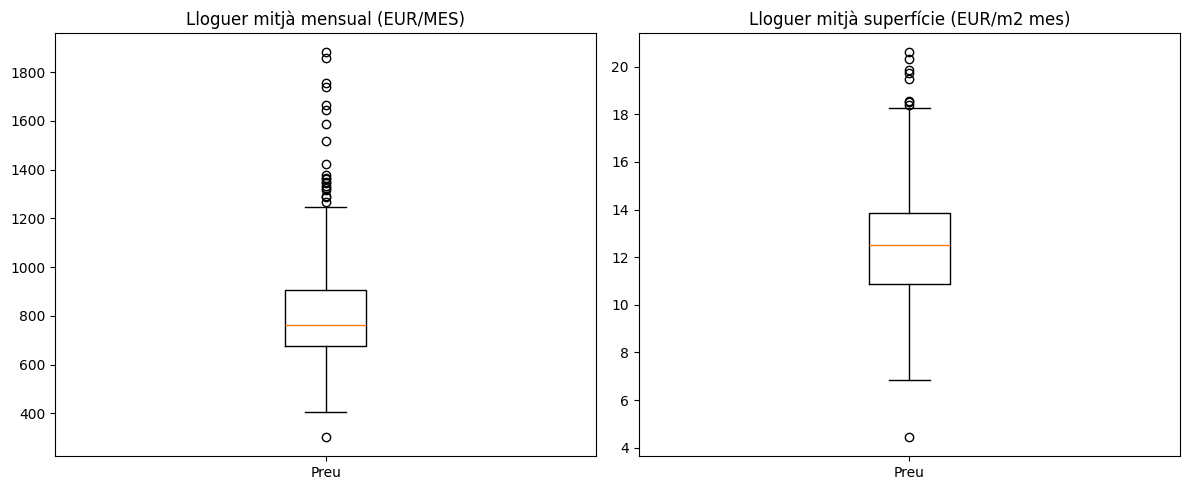

In [12]:
import matplotlib.pyplot as plt
import numpy as np

df_alquilers_lloguer_mitja_mensual = df_alquilers_sense_redundancia[df_alquilers_sense_redundancia['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
df_alquilers_lloguer_mitja_superficie = df_alquilers_sense_redundancia[df_alquilers_sense_redundancia['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# boxplot lloguer mitjà mensual
axs[0].boxplot(df_alquilers_lloguer_mitja_mensual['Preu'])
axs[0].set_title('Lloguer mitjà mensual (EUR/MES)')
axs[0].set_xticks([1])
axs[0].set_xticklabels(['Preu'])

# boxplot lloguer mitjà superficie
axs[1].boxplot(df_alquilers_lloguer_mitja_superficie['Preu'])
axs[1].set_title('Lloguer mitjà superfície (EUR/m2 mes)')
axs[1].set_xticks([1])
axs[1].set_xticklabels(['Preu'])

plt.tight_layout()
plt.show()


>Es pot observar que es detecten valors atípics tan quan es parla de preus de lloguers mitjans mensuals com de preus de lloguers mitjans per superficie. A continuació es comprova de quins registres es tracten i si són valors atípics o anomals.
>
>+ Per el cas de lloguers mitjans mensuals.

In [13]:
Preu_estadistica = df_alquilers_lloguer_mitja_mensual['Preu'].describe()

# Rang interquartilic (IQR)
IQR = Preu_estadistica['75%'] - Preu_estadistica['25%']

# Limits respecte valors atípicos
limit_inferior = Preu_estadistica['25%'] - 1.5 * IQR
limit_superior =  Preu_estadistica['75%'] + 1.5 * IQR

# Identifiquem el valor atípic
outliers = df_alquilers_lloguer_mitja_mensual[(df_alquilers_lloguer_mitja_mensual['Preu'] < limit_inferior) |
                                              (df_alquilers_lloguer_mitja_mensual['Preu'] > limit_superior)]

# extreiem el nom de districte i de barri
outliers = outliers.copy()
outliers['Barri'] = outliers['Codi_Barri'].map(dict_barris_alquilers)
outliers['Districte'] = outliers['Codi_Districte'].map(dict_districte_alquilers)
outliers = outliers.drop(['Codi_Barri', 'Lloguer_mitja', 'Codi_Districte', 'Trimestre'], axis=1)
print("Registres amb valors atípics de la columna 'Preu' de lloguer mitja mensual: \n {}".format(outliers))

Registres amb valors atípics de la columna 'Preu' de lloguer mitja mensual: 
         Preu  _id                                  Barri            Districte
20   1856.57   21                              Pedralbes            Les Corts
22   1291.50   23                                 Sarrià  Sarrià-Sant Gervasi
23   1516.52   24                        les Tres Torres  Sarrià-Sant Gervasi
25   1268.61   26                 Sant Gervasi - Galvany  Sarrià-Sant Gervasi
93   1666.63   94                              Pedralbes            Les Corts
95   1423.86   96                                 Sarrià  Sarrià-Sant Gervasi
96   1646.76   97                        les Tres Torres  Sarrià-Sant Gervasi
99   1287.23   99                 Sant Gervasi - Galvany  Sarrià-Sant Gervasi
128   302.52  129                               Vallbona           Nou Barris
139  1345.63  140          la Vila Olímpica del Poblenou           Sant Martí
166  1882.42  167                              Pedralbes        

>S'observa que la majoria dels valors atípicament superiors respecte el preu del lloguer mitja mensual, estan associats a barris del districte de Sarrià-Sant Gervasi o bé al barri de Pedralbes del districte de Les Corts. Aquestes dues àrees són conegudes com a zones on resideix la classe alta de Barcelona, i, per tant, resulta coherent que els preus del lloguer superin els límits superiors esperats.
També s'identifiquen lloguers mitjans mensuals més elevat de lo normal al barri de la Vila Olímpica del Poblenou, a Sant Martí; no obstant, aquest valors al situar-se al voltant de 1350 euros encara es poden considerar un alquiler raonable a Barcelona.
>
>D'altra banda, hi ha un preu de lloguer mitja mensual de 302,52 euros al barri de Vallbona, al districte de Nou Barris, el qual es pot considerar anòmal, ja que és considerablement baix en comparació amb els lloguers habituals oferts a Barcelona. Per tant, s'eliminarà.

In [14]:
# eliminem el registre amb _id = 129 del joc de dades complet.
df_alquilers_sense_redundancia = df_alquilers_sense_redundancia[df_alquilers_sense_redundancia['_id'] != 129]

>+ Per el cas de lloguers mitjans per superfície mensuals

In [15]:
Preu_estadistica = df_alquilers_lloguer_mitja_superficie['Preu'].describe()

# Rang interquartilic (IQR)
IQR = Preu_estadistica['75%'] - Preu_estadistica['25%']

# Limits respecte valors atípics
limit_inferior = Preu_estadistica['25%'] - 1.5 * IQR
limit_superior =  Preu_estadistica['75%'] + 1.5 * IQR

# Identifiquem el valor atípic
outliers = df_alquilers_lloguer_mitja_superficie[(df_alquilers_lloguer_mitja_superficie['Preu'] < limit_inferior) |
                                              (df_alquilers_lloguer_mitja_superficie['Preu'] > limit_superior)]

# extreiem el nom de districte i de barri
outliers = outliers.copy()
outliers['Barri'] = outliers['Codi_Barri'].map(dict_barris_alquilers)
outliers['Districte'] = outliers['Codi_Districte'].map(dict_districte_alquilers)
outliers = outliers.drop(['Codi_Barri', 'Lloguer_mitja', 'Codi_Districte', 'Trimestre'], axis=1)
print("Registres amb valors atípics de la columna 'Preu' de lloguer mitja per superficie mensual: \n {}".format(outliers))

Registres amb valors atípics de la columna 'Preu' de lloguer mitja per superficie mensual: 
       Preu  _id                                  Barri            Districte
294  19.46  295                         la Barceloneta         Ciutat Vella
367  19.87  368                         la Barceloneta         Ciutat Vella
421   4.45  421                               Vallbona           Nou Barris
433  18.51  432          la Vila Olímpica del Poblenou           Sant Martí
442  19.72  441                         la Barceloneta         Ciutat Vella
460  20.61  460  Vallvidrera, el Tibidabo i les Planes  Sarrià-Sant Gervasi
513  20.33  514                         la Barceloneta         Ciutat Vella
532  18.56  533  Vallvidrera, el Tibidabo i les Planes  Sarrià-Sant Gervasi
534  18.38  535                        les Tres Torres  Sarrià-Sant Gervasi


>S'observa que gran part dels valors atípicament superiors respecte el preu del lloguer mitja per superfície mensual, estan associats a barris del districte de Sarrià-Sant Gervasi. Com s'ha dit anteriorment, es una àrea coneguda com a zona on resideix la classe alta de Barcelona, i, per tant, resulta coherent que els preus superin els límits superiors esperats. També es torna a identificar un lloguer mitja per superfície mensual més elevat de lo normal al barri de la Vila Olímpica del Poblenou, a Sant Martí; no obstant, aquest valors al situar-se al voltant de 18.51 euros encara es pot considerar un alquiler raonable a Barcelona.
A més, es detecta un preu del lloguer mitja per superfície mensual atípicament eleval en el barri de la Barceloneta, al districte de Ciutat Vella. Si es té en compte que és una zona molt turística que forma part del casc antic i esta prop a la platja, resulta lògic que el preu d'alquiler per metre cuadrat sigui més elevat. 
>
>D'altra banda, igual que en el anàlisis anterior, s'observa un preu de lloguer mitja per superfície mensual de 4,45 euros al barri de Vallbona, al districte de Nou Barris, el qual es pot considerar anòmal, ja que és considerablement baix en comparació amb els lloguers per superfície cuadrada habituals oferts a Barcelona. Per tant, també s'eliminarà.

In [16]:
# eliminem el registre amb _id = 421 del joc de dades complet.
df_alquilers_sense_redundancia = df_alquilers_sense_redundancia[df_alquilers_sense_redundancia['_id'] != 421]

In [17]:
df_alquilers_sense_redundancia.head(2)

,Codi_Districte,Lloguer_mitja,Trimestre,Preu,Codi_Barri,_id
0,1,Lloguer mitjà mensual (Euros/mes),1,734.99,1,1
1,1,Lloguer mitjà mensual (Euros/mes),1,905.26,2,2


> Com es pot veure durant la generació del diagrames de caixes, els valors de la variable *Preu* es poden agrupar en dos categories ben diferenciades. Per fer més fàcil la manipulació del conjunt de dades en el futur, s'ha reorganitzat. Tal que per a cada *Codi_Districte*, *Trimestre* i *Codi_Barri*, es tindrà un preu de lloguer mitja mensual i un preu de lloguer mitjà per superfície.


In [18]:
# Seleccionem els registres per al lloguer mitjà mensual i el lloguer mitjà per superfície
df_alquilers_lloguer_mitja_mensual = df_alquilers_sense_redundancia[df_alquilers_sense_redundancia['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
df_alquilers_lloguer_mitja_superficie = df_alquilers_sense_redundancia[df_alquilers_sense_redundancia['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']

# Eliminem la columna 'Lloguer_mitja'
df_alquilers_lloguer_mitja_mensual = df_alquilers_lloguer_mitja_mensual.drop(['Lloguer_mitja'], axis=1)
df_alquilers_lloguer_mitja_superficie = df_alquilers_lloguer_mitja_superficie.drop(['Lloguer_mitja'], axis=1)

# Unim els dos conjunts de dades
df_alquilers_reestructurado = df_alquilers_lloguer_mitja_mensual.merge(df_alquilers_lloguer_mitja_superficie,
                                                                       on=['Codi_Districte', 'Trimestre', 'Codi_Barri'], 
                                                                       how='left')

# Canviem els noms de les columnes
df_alquilers_reestructurado.rename(columns={'Preu_x': 'Preu_lloguer_mitja_mensual',
                                            'Preu_y': 'Preu_lloguer_mitja_superficie',
                                            '_id_x': 'id_alquiler'}, inplace=True)

# Eliminem la columna '_id_y'
df_alquilers_reestructurado = df_alquilers_reestructurado.drop(['_id_y'], axis=1)


In [19]:
df_alquilers_reestructurado.head(3)

,Codi_Districte,Trimestre,Preu_lloguer_mitja_mensual,Codi_Barri,id_alquiler,Preu_lloguer_mitja_superficie
0,1,1,734.99,1,1,13.50
1,1,1,905.26,2,2,14.14
2,1,1,722.78,3,3,19.46


+ **Joc de dades: "df_accidents"**

>En primer lloc, s'identifica que aquest joc de dades te variables que aporten informació redundant i en conseqüencia es poden eliminar. Aquestes variables son:
>+ *NK_Any* : des d'un inici ja es sap que estem treballant exclusivament amb dades extretes en l'any 2017.
>
>+ *Nom_Districte* : Aquesta variable proporciona la mateixa informació que la columna Codi_districte. Per tant, podem eliminar-la del conjunt de dades i crear un diccionari que relacioni cada categoria de Nom_Districte amb el seu identificador de Codi_districte corresponent.
>
>+ *Nom_Barri* : Aquesta variable proporciona la mateixa informació que la columna *Codi_Barri*. Per tant, podem eliminar-la del conjunt de dades i crear un diccionari que relacioni cada categoria de *Nom_Barri* amb el seu identificador de *Codi_Barri* corresponent.
>
>+ *Nom_carrer* : aquesta variable proporciona la mateixa informació que la columna *Codi_carrer*. Per tant, podem eliminar-la del conjunt de dades i crear un diccionari que relacioni cada categoria de *Nom_carrer* amb el seu identificador *Codi_carrer* corresponent.
>
>+ *Nom_mes* : aquesta variable proporciona la mateixa informació que la columna *Mes_any*. Per tant, podem eliminar-la del conjunt de dades i crear un diccionari que relacioni cada categoria de *Nom_mes* amb el seu identificador *Mes_any* corresponent.


In [20]:
df_accidents.head(2)

,Latitud,Codi_districte,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Nom_districte,Descripcio_torn,NK_Any,Codi_carrer,Nom_carrer,Dia_mes,...,Nom_mes,Nom_barri,Hora_dia,Longitud,Numero_expedient,Codi_barri,Mes_any,_id,Num_postal,Descripcio_dia_setmana
0,41.411606,-1,427585.89,4577869.16,Desconegut,Desobeir altres senyals,2017,-1,Motors ...,6,...,Juny,Desconegut,8,2.191767,2017S004939,-1,6,1,43-51,Dimarts
1,41.419635,-1,426505.49,4581655.96,Desconegut,Gir indegut o sense precaució,2017,-1,Joan XXIII / Martí i Franquès ...,26,...,Setembre,Desconegut,9,2.199239,2017S007937,-1,9,2,,Dimarts


In [21]:
# Generem els diccionaris
dict_districte_accidents = df_accidents.set_index('Codi_districte')['Nom_districte'].to_dict()
dict_barri_accidents = df_accidents.set_index('Codi_barri')['Nom_barri'].to_dict()
dict_barri_accidents = {k: dict_barri_accidents[k] for k in sorted(dict_barri_accidents)}
dict_carrer_accidents = df_accidents.set_index('Codi_carrer')['Nom_carrer'].to_dict()
dict_mesos_accidents = df_accidents.set_index('Mes_any')['Nom_mes'].to_dict()

# eliminem columnes redundants
df_accidents_sense_redundancia = df_accidents.drop(['NK_Any', 'Nom_districte', 'Nom_barri', 'Nom_carrer', "Nom_mes"], axis=1)

# Comprovem que els diccionaris de dict_districte_accidents i dict_districte_alquilers tenen per les mateixes claus el 
# mateix districte. Si són igual només utilitzarem el dict_districte_alquilers. 
diferents_noms_districte = []
for clau in dict_districte_alquilers:
    if clau in dict_districte_accidents and dict_districte_accidents[clau] == dict_districte_alquilers[clau]:
        continue
    else:
        diferent_noms = [clau,dict_districte_alquilers[clau],dict_districte_accidents[clau]]
        diferents_noms_districte.append(diferent_noms)

if len(diferents_noms_districte) == 0:
    print("Els dos diccionaris tenen per els mateixos 'Codi_districte' el mateix 'Nom_districte'")
else:
    print("Els dos diccionaris no tenen per els mateixos 'Codi_districte' el mateix 'Nom_districte'")
    print(diferents_noms_districte)

    
# Comprovem que els diccionaris de dict_barris_accidents i dict_barris_alquilers tenen per les mateixes claus el 
# mateix barri. Si són igual només utilitzarem el dict_barris_alquilers. 
diferents_noms_barris = []
for clau in dict_barris_alquilers:
    if clau in dict_barri_accidents and dict_barri_accidents[clau] == dict_barris_alquilers[clau]:
        continue
    else:
        diferent_noms = [clau,dict_barris_alquilers[clau],dict_barri_accidents[clau]]
        diferents_noms_barris.append(diferent_noms)

if len(diferents_noms_barris) == 0:
    print("Els dos diccionaris tenen per els mateixos 'Codi_barri' el mateix 'Nom_barri'")
else:
    print("Els dos diccionaris no tenen per els mateixos 'Codi_barri' el mateix 'Nom_barri'")
    print(diferents_noms_barris)
    
   

Els dos diccionaris tenen per els mateixos 'Codi_districte' el mateix 'Nom_districte'
Els dos diccionaris no tenen per els mateixos 'Codi_barri' el mateix 'Nom_barri'
[[11, 'el Poble Sec', 'el Poble-sec']]


> S'observa una petita discrepància en la forma d'escriure els barris entre el diccionari de barris del conjunt de dades de lloguers i el del conjunt de dades d'accidents. Malgrat això, es pot constatar que es tracta del mateix barri. Per tant, d'ara endavant, treballarem directament amb el diccionari de barris del conjunt de dades de lloguers.

> En segon lloc, analitzaré si tenim valors nuls

In [22]:
valors_nuls_accidents = df_accidents_sense_redundancia.isnull().sum()
print(valors_nuls_accidents)

Latitud                       0
Codi_districte                0
Coordenada_UTM_X_ED50         0
Coordenada_UTM_Y_ED50         0
Descripcio_torn               0
Codi_carrer                   0
Dia_mes                       0
Descripcio_causa_conductor    0
Hora_dia                      0
Longitud                      0
Numero_expedient              0
Codi_barri                    0
Mes_any                       0
_id                           0
Num_postal                    0
Descripcio_dia_setmana        0
dtype: int64


> No es detecta cap valor nul, per tant, no caldra fer cap mètode d'imputació de valors.



In [23]:
# renombrem la columna id
df_accidents_sense_redundancia.rename(columns={'_id': 'id_accident'}, inplace=True)

#### Generació del joc de dades unificat.

A continuació complementarem els jocs de dades de "df_alquilers" amb la informació procedents del joc de dades de "df_accidents".

Per fer la unió utilitzarem les variables "Codi_Districte" i "Trimestre".
Per tant, previament caldrà generar una variable "Trimestre" a "df_accidents_sense_redundancia" 

In [24]:
def asignar_trimestre(mes):
    """
    Funció que determina el tremestre de cada mes.
    
    Paràmetres:
    + mes (int): numero del mes
    
    Retorna:
    - trimestre (int) : trimestre al que es correspon el mes
    """
    if 1 <= mes <= 3:
        return 1
    elif 4 <= mes <= 6:
        return 2
    elif 7 <= mes <= 9:
        return 3
    elif 10 <= mes <= 12:
        return 4

# Generem columna Trimestre
df_accidents_sense_redundancia['Trimestre'] = df_accidents_sense_redundancia['Mes_any'].apply(asignar_trimestre)

# Modifiquem el nom de "Codi_districte" per a que sigui igual en els dos jocs de dades
df_accidents_sense_redundancia = df_accidents_sense_redundancia.rename(columns={'Codi_districte': 'Codi_Districte'})

In [25]:
# procedim a unir els dos jocs de dades
df_unificat = df_alquilers_reestructurado.merge(df_accidents_sense_redundancia, on=['Codi_Districte', 'Trimestre'], 
                                                   how='left')


In [26]:
df_unificat.head(2)

,Codi_Districte,Trimestre,Preu_lloguer_mitja_mensual,Codi_Barri,id_alquiler,Preu_lloguer_mitja_superficie,Latitud,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Descripcio_torn,...,Dia_mes,Descripcio_causa_conductor,Hora_dia,Longitud,Numero_expedient,Codi_barri,Mes_any,id_accident,Num_postal,Descripcio_dia_setmana
0,1,1,734.99,1,1,13.5,41.383382,431886.71,4581842.59,Desconegut,...,5,Nit,0,2.184246,2017S001807,3,3,255,0014 0014,Diumenge
1,1,1,734.99,1,1,13.5,41.391862,433029.72,4582773.38,No respectat pas de vianants,...,12,Matí,8,2.197812,2017S000279,1,1,156,0050 0052,Dijous


### 4. Selecció de variables.

El següent pas es basa en la seleccio de variables d'interés del conjunt de dades. Per això primer eliminaré aquelles variables que de primeres no aporten ningun tipus d'informació rellevant per el cas d'estudi. 

In [27]:
# eliminem variables que de primeres se que no vull utilitzar

df_unificat_filtrat = df_unificat.drop(['Numero_expedient', 'Num_postal', "Longitud", "Latitud", "Coordenada_UTM_X_ED50",
                                       "Coordenada_UTM_Y_ED50"], axis=1)

# Obtenim el nom de les columnes numéricas y categóricas
columnes_numèriques = ['Preu_lloguer_mitja_mensual', 'Preu_lloguer_mitja_superficie', 'Dia_mes', 'Hora_dia', 'Mes_any', 'Trimestre']
columnes_categoriques = ['Codi_Districte', 'Codi_Barri' , 'Codi_carrer', 'Descripcio_torn',
                         'Descripcio_causa_conductor' , 'Descripcio_dia_setmana']




Despres faré un processament del joc de dades unificat de tal manera que aquest puguem reduïr la seva dimensionalitat obtenint aquelles variables realment rellevants. Per això s'aplicara un PCA (variables numèriques) i un MCA  (variables categòriques) .

+ **PCA**

Per a poder aplicar un analisis de components principals caldrà estandaritzar les variables numèriques.

In [28]:
from sklearn.preprocessing import StandardScaler

# normalització de variables numèriques 
ss = StandardScaler()
df_unificat_filtrat[columnes_numèriques] = ss.fit_transform(df_unificat_filtrat[columnes_numèriques] )

Procedim a aplicar el analisis de components principals, per les diferents variables numèriques que disposem.

In [29]:
from prince import PCA

# calculem els components principals respecte les variables numèriques
pca = PCA(n_components=4)
pca.fit(df_unificat_filtrat[columnes_numèriques])

pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,2.080,34.66%,34.66%
1,1.643,27.39%,62.04%
2,1.010,16.84%,78.88%
3,0.989,16.48%,95.36%


In [30]:
pca.scree_plot()

alt.Chart(...)

S'observa que amb 4 components principals s'aconsegueix explicar més del 90% de la varianza de les variables numèriques que formen el joc de dades.

In [31]:
# coordenadas de les diferentes variables para cada component
pca.column_coordinates_

component,0,1,2,3
variable,,,,
Preu_lloguer_mitja_mensual,0.474466,0.806665,0.005741,-0.013919
Preu_lloguer_mitja_superficie,0.526456,0.772529,0.011226,-0.000013
Dia_mes,0.045641,-0.000172,-0.690999,0.721408
Hora_dia,0.000231,0.002558,-0.729465,-0.683996
Mes_any,0.886758,-0.446174,0.010903,-0.015801
Trimestre,0.888162,-0.443367,0.015092,-0.013674


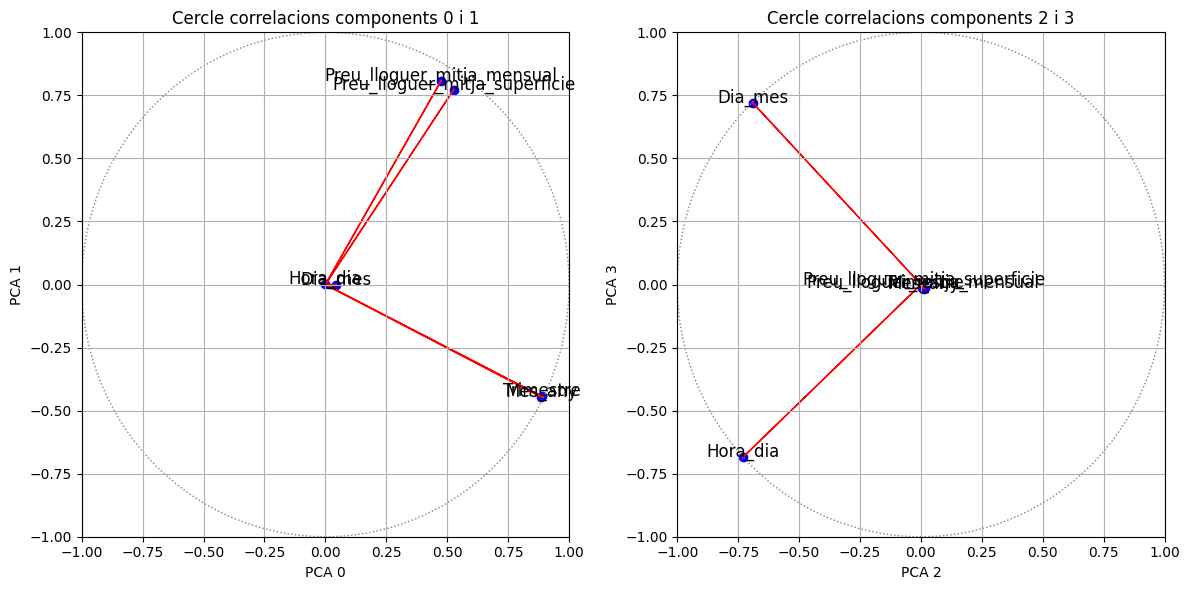

In [32]:
# Crea cercle de correlacions d
variables_pca = pca.column_coordinates_

# Components 0, 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(variables_pca[0], variables_pca[1], c='b')

for i, variable in enumerate(variables_pca.index):
    plt.arrow(0, 0, variables_pca.iloc[i, 0], variables_pca.iloc[i, 1], color='r')
    plt.text(variables_pca.iloc[i, 0], variables_pca.iloc[i, 1], variable, fontsize=12, ha='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='dotted')
plt.gca().add_artist(circle)
plt.grid()
plt.title('Cercle correlacions components 0 i 1')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')

# Components 2, 3
plt.subplot(1, 2, 2)
plt.scatter(variables_pca[2], variables_pca[3], c='b')

for i, variable in enumerate(variables_pca.index):
    plt.arrow(0, 0, variables_pca.iloc[i, 2], variables_pca.iloc[i, 3], color='r')
    plt.text(variables_pca.iloc[i, 2], variables_pca.iloc[i, 3], variable, fontsize=12, ha='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='dotted')
plt.gca().add_artist(circle)
plt.grid()
plt.title('Cercle correlacions components 2 i 3')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')

plt.tight_layout()
plt.show()


Pel que fa a les coordenades de les variables numèriques en l'espai dels quatre components principals, podem determinar el següent:

+ *"Preu_lloguer_mitja_mensual"* i *"Preu_lloguer_mitja_superfície"* són variables significatives pels components 0 i 1, i estan fortament correlacionades entre elles.

+ *"Mes_any"* i *"Trimestre"* són variables significatives pels components 0 i 1, i estan extremadament correlacionades entre elles. En aquest cas, seria possible eliminar-ne una.

+ *"Dia_mes"* i *"Hora_dia"* són variables significatives pels components 2 i 3, tot i que es relacionen inversament entre elles.